# Data Visualization


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
hea_dataset = "/content/drive/MyDrive/AlloyDataset/hea-dataset.csv"
SRO = "/content/drive/MyDrive/AlloyDataset/SRO.csv"
structure = "/content/drive/MyDrive/AlloyDataset/structure_ini_featurized.dat_all.csv"

In [ ]:
# import csv
# df = pd.read_csv('dataset.csv',quoting=csv.QUOTE_NONE,on_bad_lines='skip')
df = pd.read_csv(structure,on_bad_lines='skip')

In [ ]:
df.head()

,fid,reduced_formula,lattice,Ef_per_atom,e_above_hull,NIONS,magmom,nelements,chemical_system,elements,...,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,compound possible,max ionic char,avg ionic char
0,ced40763833,Mn3AlFeCo2SiNi,bcc,-0.100992,0.393956,27,-0.050 -0.048 -0.033 1.392 1.322 1.198 1.266 1...,6,Al-Co-Fe-Mn-Ni-Si,"['Al', 'Co', 'Fe', 'Mn', 'Ni', 'Si']",...,216.111111,9.827160,217.0,0.281250,0.046875,0.671875,0.0,False,0.031881,0.006224
1,gra62281343,Cr3CoNi2,bcc,0.074483,0.087468,6,0.079 1.429 -1.592 -1.499 -0.175 -0.034,3,Co-Cr-Ni,"['Co', 'Cr', 'Ni']",...,221.833333,9.277778,229.0,0.191489,0.000000,0.808511,0.0,False,0.015504,0.003599
2,ced49176496,Mn2CoCu,fcc,0.212933,0.244893,4,1.070 0.125 2.597 2.118,3,Co-Cu-Mn,"['Co', 'Cu', 'Mn']",...,213.250000,9.625000,217.0,0.205882,0.000000,0.794118,0.0,False,0.030161,0.007134
3,gra66940684,CoCu4Ni,bcc,0.148515,0.156841,6,1.545 -0.012 0.017 0.013 0.020 0.164,3,Co-Cu-Ni,"['Co', 'Cu', 'Ni']",...,219.833333,8.611111,225.0,0.126984,0.000000,0.873016,0.0,False,0.000225,0.000020
4,gra63621,AlCu7,bcc,-0.052111,0.040544,64,0.000 -0.000 -0.000 0.000 0.000 -0.000 -0.000 ...,2,Al-Cu,"['Al', 'Cu']",...,225.000000,0.000000,225.0,0.112500,0.012500,0.875000,0.0,False,0.020806,0.002276


In [ ]:
df.columns

Index(['fid', 'reduced_formula', 'lattice', 'Ef_per_atom', 'e_above_hull',
       'NIONS', 'magmom', 'nelements', 'chemical_system', 'elements',
       ...
       'MagpieData mean SpaceGroupNumber',
       'MagpieData avg_dev SpaceGroupNumber',
       'MagpieData mode SpaceGroupNumber', 'frac s valence electrons',
       'frac p valence electrons', 'frac d valence electrons',
       'frac f valence electrons', 'compound possible', 'max ionic char',
       'avg ionic char'],
      dtype='object', length=292)

In [ ]:
features = df.columns[-273:]
compositions = features[-145:]
structures = features[:-145]

In [ ]:
df.isna().sum()

,0
fid,0
reduced_formula,0
lattice,0
Ef_per_atom,0
e_above_hull,0
...,...
frac d valence electrons,0
frac f valence electrons,0
compound possible,0
max ionic char,0


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(83797, 292)

In [ ]:
df_sro = pd.read_csv(SRO)

In [ ]:
df_sro.head()

,Unnamed: 0,mean SRO1,max SRO1,min SRO1,std SRO1,range SRO1,mean abs SRO1,max abs SRO1,min abs SRO1,std abs SRO1,...,mean SRO4,max SRO4,min SRO4,std SRO4,range SRO4,mean abs SRO4,max abs SRO4,min abs SRO4,std abs SRO4,range abs SRO4
0,ced48356415,-0.016382,0.198718,-0.350309,0.127514,0.549027,0.103298,0.350309,0.003344,0.076535,...,-4.323296e-02,0.356996,-0.414609,0.173025,0.771605,0.137791,0.414609,0.023860,0.113228,0.390749
1,gra62502199,-0.041667,0.500000,-1.000000,0.508606,1.500000,0.375000,1.000000,0.000000,0.346109,...,4.000000e-01,1.000000,-0.800000,0.848528,1.800000,0.933333,1.000000,0.800000,0.094281,0.200000
2,gra62511251,-0.020833,0.250000,-0.500000,0.254303,0.750000,0.187500,0.500000,0.000000,0.173055,...,-1.480297e-16,1.000000,-2.000000,1.414214,3.000000,1.333333,2.000000,1.000000,0.471405,1.000000
3,gra62512663,0.166667,1.000000,-1.000000,0.687184,2.000000,0.500000,1.000000,0.000000,0.500000,...,-2.500000e-01,1.000000,-0.500000,0.559017,1.500000,0.583333,1.000000,0.500000,0.186339,0.500000
4,gra64678455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.111111e-01,0.111111,0.111111,0.000000,0.000000,0.111111,0.111111,0.111111,0.000000,0.000000


In [ ]:
df_sro.isna().sum()

,0
Unnamed: 0,0
mean SRO1,0
max SRO1,0
min SRO1,0
std SRO1,0
range SRO1,0
mean abs SRO1,0
max abs SRO1,0
min abs SRO1,0
std abs SRO1,0


In [ ]:
df_sro.shape

(83797, 41)

In [ ]:
df = pd.concat([df,df_sro],axis=1)

In [ ]:
df.head()

,fid,reduced_formula,lattice,Ef_per_atom,e_above_hull,NIONS,magmom,nelements,chemical_system,elements,...,mean SRO4,max SRO4,min SRO4,std SRO4,range SRO4,mean abs SRO4,max abs SRO4,min abs SRO4,std abs SRO4,range abs SRO4
0,ced40763833,Mn3AlFeCo2SiNi,bcc,-0.100992,0.393956,27,-0.050 -0.048 -0.033 1.392 1.322 1.198 1.266 1...,6,Al-Co-Fe-Mn-Ni-Si,"['Al', 'Co', 'Fe', 'Mn', 'Ni', 'Si']",...,-4.323296e-02,0.356996,-0.414609,0.173025,0.771605,0.137791,0.414609,0.023860,0.113228,0.390749
1,gra62281343,Cr3CoNi2,bcc,0.074483,0.087468,6,0.079 1.429 -1.592 -1.499 -0.175 -0.034,3,Co-Cr-Ni,"['Co', 'Cr', 'Ni']",...,4.000000e-01,1.000000,-0.800000,0.848528,1.800000,0.933333,1.000000,0.800000,0.094281,0.200000
2,ced49176496,Mn2CoCu,fcc,0.212933,0.244893,4,1.070 0.125 2.597 2.118,3,Co-Cu-Mn,"['Co', 'Cu', 'Mn']",...,-1.480297e-16,1.000000,-2.000000,1.414214,3.000000,1.333333,2.000000,1.000000,0.471405,1.000000
3,gra66940684,CoCu4Ni,bcc,0.148515,0.156841,6,1.545 -0.012 0.017 0.013 0.020 0.164,3,Co-Cu-Ni,"['Co', 'Cu', 'Ni']",...,-2.500000e-01,1.000000,-0.500000,0.559017,1.500000,0.583333,1.000000,0.500000,0.186339,0.500000
4,gra63621,AlCu7,bcc,-0.052111,0.040544,64,0.000 -0.000 -0.000 0.000 0.000 -0.000 -0.000 ...,2,Al-Cu,"['Al', 'Cu']",...,1.111111e-01,0.111111,0.111111,0.000000,0.000000,0.111111,0.111111,0.111111,0.000000,0.000000


In [ ]:
df.isna().sum()

,0
fid,0
reduced_formula,0
lattice,0
Ef_per_atom,0
e_above_hull,0
...,...
mean abs SRO4,0
max abs SRO4,0
min abs SRO4,0
std abs SRO4,0


In [ ]:
rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls

,fid,reduced_formula,lattice,Ef_per_atom,e_above_hull,NIONS,magmom,nelements,chemical_system,elements,...,mean SRO4,max SRO4,min SRO4,std SRO4,range SRO4,mean abs SRO4,max abs SRO4,min abs SRO4,std abs SRO4,range abs SRO4


In [ ]:
chemical_system = df["chemical_system"]
chemical_system

,chemical_system
0,Al-Co-Fe-Mn-Ni-Si
1,Co-Cr-Ni
2,Co-Cu-Mn
3,Co-Cu-Ni
4,Al-Cu
...,...
83792,Al-Co-Cr-Fe-Mn-Ni-Si
83793,Cr-Fe-Mn
83794,Co-Cr-Fe-Mn-Si
83795,Al-Co-Cu-Si


In [ ]:
elements = ["Al","Si","Cr","Mn","Fe","Co","Ni","Cu"]

In [ ]:
nstructures = {}
nstructures_ele = {}
for element in elements:
    nstructures[element] = chemical_system.str.contains(element).sum()
    for ele in range(2,8):
      nstructures_ele[element,ele] = df[df['nelements']==ele]['chemical_system'].str.contains(element).sum()

In [ ]:
print(nstructures)
print(nstructures_ele)

{'Al': 24868, 'Si': 24450, 'Cr': 53132, 'Mn': 53194, 'Fe': 53240, 'Co': 53186, 'Ni': 53132, 'Cu': 16154}
{('Al', 2): 678, ('Al', 3): 4885, ('Al', 4): 6824, ('Al', 5): 4298, ('Al', 6): 3715, ('Al', 7): 4468, ('Si', 2): 686, ('Si', 3): 4497, ('Si', 4): 6784, ('Si', 5): 4294, ('Si', 6): 3721, ('Si', 7): 4468, ('Cr', 2): 1712, ('Cr', 3): 12044, ('Cr', 4): 22109, ('Cr', 5): 9124, ('Cr', 6): 3675, ('Cr', 7): 4468, ('Mn', 2): 1724, ('Mn', 3): 12070, ('Mn', 4): 22161, ('Mn', 5): 9115, ('Mn', 6): 3657, ('Mn', 7): 4467, ('Fe', 2): 1732, ('Fe', 3): 12065, ('Fe', 4): 22165, ('Fe', 5): 9125, ('Fe', 6): 3685, ('Fe', 7): 4468, ('Co', 2): 1727, ('Co', 3): 12091, ('Co', 4): 22122, ('Co', 5): 9120, ('Co', 6): 3659, ('Co', 7): 4467, ('Ni', 2): 1733, ('Ni', 3): 12028, ('Ni', 4): 22106, ('Ni', 5): 9126, ('Ni', 6): 3672, ('Ni', 7): 4467, ('Cu', 2): 1388, ('Cu', 3): 6520, ('Cu', 4): 7873, ('Cu', 5): 173, ('Cu', 6): 106, ('Cu', 7): 94}


Text(0, 0.5, 'Number of structures')

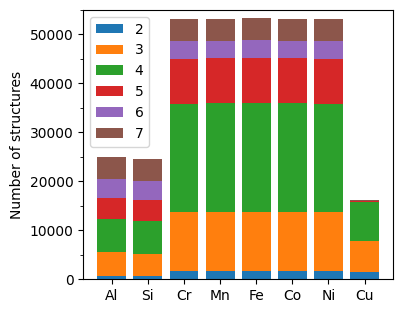

In [ ]:
fig, ax = plt.subplots(figsize=(4,3.5))
# ax.bar(nstructures.keys(),nstructures.values())
# make a stacked bar plot using nstructures_ele
bottom = np.zeros(len(elements))
for ele in range(2,8):
    ax.bar(elements,[nstructures_ele[element,ele] for element in elements],bottom=bottom,label=str(ele))
    bottom += np.array([nstructures_ele[element,ele] for element in elements])
ax.legend()

ax.set_ylim(0,5.5e4)
# add minor yticks (5000)
ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(5000))
ax.set_ylabel('Number of structures')

# Demo Training


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [ ]:
model = Pipeline([
    ('scaler',StandardScaler()),
    ('model',xgb.XGBRegressor(
        n_estimators=500,
        learning_rate=0.4,
        reg_lambda=0.01,
        reg_alpha=0.1,
        colsample_bytree=0.5,
        colsample_bylevel=0.7,
        num_parallel_tree=6,
        tree_method="hist",
        device="cuda"
    ))
])

In [ ]:
df = pd.read_csv(structure,index_col=0)

In [ ]:
df.head()

,reduced_formula,lattice,Ef_per_atom,e_above_hull,NIONS,magmom,nelements,chemical_system,elements,volume_per_atom,...,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,compound possible,max ionic char,avg ionic char
fid,,,,,,,,,,,,,,,,,,,,,
ced40763833,Mn3AlFeCo2SiNi,bcc,-0.100992,0.393956,27,-0.050 -0.048 -0.033 1.392 1.322 1.198 1.266 1...,6,Al-Co-Fe-Mn-Ni-Si,"['Al', 'Co', 'Fe', 'Mn', 'Ni', 'Si']",11.812936,...,216.111111,9.827160,217.0,0.281250,0.046875,0.671875,0.0,False,0.031881,0.006224
gra62281343,Cr3CoNi2,bcc,0.074483,0.087468,6,0.079 1.429 -1.592 -1.499 -0.175 -0.034,3,Co-Cr-Ni,"['Co', 'Cr', 'Ni']",11.238291,...,221.833333,9.277778,229.0,0.191489,0.000000,0.808511,0.0,False,0.015504,0.003599
ced49176496,Mn2CoCu,fcc,0.212933,0.244893,4,1.070 0.125 2.597 2.118,3,Co-Cu-Mn,"['Co', 'Cu', 'Mn']",11.687115,...,213.250000,9.625000,217.0,0.205882,0.000000,0.794118,0.0,False,0.030161,0.007134
gra66940684,CoCu4Ni,bcc,0.148515,0.156841,6,1.545 -0.012 0.017 0.013 0.020 0.164,3,Co-Cu-Ni,"['Co', 'Cu', 'Ni']",11.691850,...,219.833333,8.611111,225.0,0.126984,0.000000,0.873016,0.0,False,0.000225,0.000020
gra63621,AlCu7,bcc,-0.052111,0.040544,64,0.000 -0.000 -0.000 0.000 0.000 -0.000 -0.000 ...,2,Al-Cu,"['Al', 'Cu']",12.414720,...,225.000000,0.000000,225.0,0.112500,0.012500,0.875000,0.0,False,0.020806,0.002276


In [ ]:
nfeatures = 273
cols_feat = df.columns[-nfeatures:]

X_all = df[cols_feat]
    # drop features whose variance is zero
X_all = X_all.loc[:,X_all.var()!=0]

In [ ]:
y_all = df['Ef_per_atom']

In [ ]:
cv = 5
y_pred = cross_val_predict(model, X_all, y_all, cv=cv)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:38:42] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [ ]:
df_y = pd.DataFrame({'Ef_true':y_all, 'Ef_pred':y_pred}, index=y_all.index)
cols2add = ['formula','lattice','NIONS']
df_y = pd.concat([df_y,df[cols2add]], axis=1)

In [ ]:
df_y

,Ef_true,Ef_pred,formula,lattice,NIONS
fid,,,,,
ced40763833,-0.100992,-0.105734,Al3Co6Fe3Mn9Ni3Si3,bcc,27
gra62281343,0.074483,0.084078,Co1Cr3Ni2,bcc,6
ced49176496,0.212933,0.140344,Co1Cu1Mn2,fcc,4
gra66940684,0.148515,0.127063,Co1Cu4Ni1,bcc,6
gra63621,-0.052111,-0.045142,Al8Cu56,bcc,64
...,...,...,...,...,...
gra64338871,-0.144497,-0.131148,Al1Co1Cr1Fe1Mn1Ni1Si1,fcc,7
ced39413340,0.131759,0.121997,Cr6Fe15Mn6,fcc,27
ced40775542,-0.002084,-0.006891,Co6Cr6Fe3Mn9Si3,bcc,27


MAD: 0.109
MAE: 0.023
R2: 0.929


Text(0.05, 0.85, 'R2: 0.929')

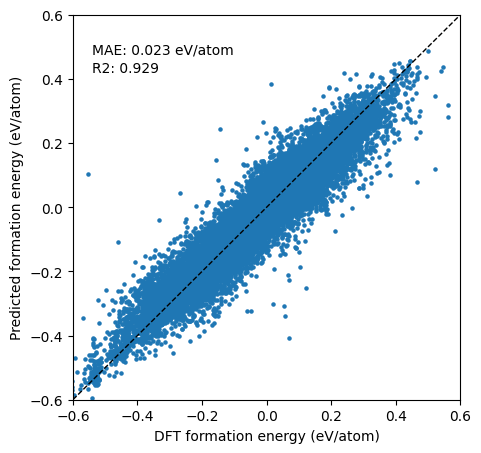

In [ ]:
mad = np.mean(np.abs(df_y['Ef_true'] - df_y['Ef_true'].mean()))
mae = mean_absolute_error(df_y['Ef_true'], df_y['Ef_pred'])
print(f'MAD: {mad:.3f}')
print(f'MAE: {mae:.3f}')
# get the r2 score
r2 = r2_score(df_y['Ef_true'], df_y['Ef_pred'])
print(f'R2: {r2:.3f}')

#%% parity plot
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df_y['Ef_true'], df_y['Ef_pred'], s=5)
lims = [-0.6, 0.6]
#diag line
ax.plot(lims,lims, 'k--', lw=1)
# set limits
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel('DFT formation energy (eV/atom)')
ax.set_ylabel('Predicted formation energy (eV/atom)')
# add scores to fig
ax.text(0.05, 0.9, f'MAE: {mae:.3f} eV/atom', transform=ax.transAxes)
ax.text(0.05, 0.85, f'R2: {r2:.3f}', transform=ax.transAxes)

# Paper Train

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [ ]:
random_state = 1

In [ ]:
pipe = {}
pipe["RF"] = Pipeline([
    ('scaler',StandardScaler()),
    ('model',RandomForestRegressor(n_estimators=100,
                                   bootstrap=False,
                                   max_features=1/3,
                                   n_jobs=-1,
                                   random_state=random_state))
])
pipe['XGB'] = Pipeline([
    ('scaler', StandardScaler()),
    ('model', xgb.XGBRegressor(
                    n_estimators=500,
                    learning_rate=0.4,
                    reg_lambda=0.01,reg_alpha=0.1,
                    colsample_bytree=0.5,colsample_bylevel=0.7,
                    num_parallel_tree=6,
                    tree_method='gpu_hist', gpu_id=0)
                    )
])

In [ ]:
print(xgb.__version__)

2.1.1


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlloyDataset/structure_ini_featurized.dat_all.csv')
nfeatures = 273
cols_feat = df.columns[-nfeatures:]
X_all = df[cols_feat]
# drop features whose variance is zero
X_all = X_all.loc[:,X_all.var()!=0]
y_all = df['Ef_per_atom']

In [ ]:
X_all.iloc[0]["max ionic char"]

0.0318807430834372

In [ ]:
def get_mad_std(s):
    # calculate the mean absolute deviation and STD of the series s
    # mean absolute deviation
    mad = (s - s.mean()).abs().mean()
    print(f'mean absolute deviation: {mad:.4f}')
    # standard deviation
    print(f'standard deviation: {s.std():.4f}')

In [ ]:
get_mad_std(y_all)

mean absolute deviation: 0.1085
standard deviation: 0.1350


In [ ]:
    # according to lattice
id_bcc = df[df['lattice']=='bcc'].index.tolist()
id_fcc = df[df['lattice']=='fcc'].index.tolist()

print('bcc:',len(id_bcc))
get_mad_std(y_all[id_bcc])
print('fcc:',len(id_fcc))
get_mad_std(y_all[id_fcc])

bcc: 43372
mean absolute deviation: 0.1096
standard deviation: 0.1369
fcc: 40425
mean absolute deviation: 0.1073
standard deviation: 0.1329


In [ ]:
    # according to nelements
id_nele = {}
for nele in [2,3,4,5,6,7]:
  id_nele[nele] = df[df['nelements']==nele].index.tolist()

id_loworder = df[df['nelements']<=3].index.tolist()
id_highorder = df[df['nelements']>3].index.tolist()


    # according to NIONS
id_all = df.index.tolist()
id_small = df[df['NIONS']<=8].index.tolist()
id_large = df[df['NIONS']>8].index.tolist()
print('small:',len(id_small))
get_mad_std(y_all[id_small])
print('large:',len(id_large))
get_mad_std(y_all[id_large])

small: 69575
mean absolute deviation: 0.1036
standard deviation: 0.1344
large: 14222
mean absolute deviation: 0.1007
standard deviation: 0.1203


In [ ]:
# df["reduced_formula","formula"]

In [ ]:
!pip install pymatgen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 40.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
from pymatgen.core.composition import Composition
composition = df['reduced_formula'].apply(lambda x: Composition(x))

In [ ]:
composition

,reduced_formula
0,"(Mn, Al, Fe, Co, Si, Ni)"
1,"(Cr, Co, Ni)"
2,"(Mn, Co, Cu)"
3,"(Co, Cu, Ni)"
4,"(Al, Cu)"
...,...
83792,"(Mn, Al, Cr, Fe, Co, Si, Ni)"
83793,"(Mn, Cr, Fe)"
83794,"(Mn, Cr, Fe, Co, Si)"
83795,"(Al, Co, Cu, Si)"


In [ ]:
def get_el_frac(x):
  el_frac_list = list(x.get_el_amt_dict().values())
  tot = sum(el_frac_list)
  el_frac = np.array([i/tot for i in el_frac_list])
  return el_frac

el_frac = composition.apply(get_el_frac)

    # For each composition, calculate the max fractional concentration and min fractional concentration
df['max_c'] = el_frac.apply(max)
df['min_c'] = el_frac.apply(min)
df['diff_c'] = df['max_c'] - df['min_c']
df['std_c'] = el_frac.apply(np.std)

In [ ]:
epochs=50
modelname = f'alignn{epochs}'
pipe[modelname] = None
import os
overwrite = False

In [ ]:
import time
def train_predict(model, X_train, y_train, X_test, y_test,print_metrics=True):
    # record the time
    time_init = time.time()

    # fit the model on the training set
    model.fit(X_train, y_train)
    # predict the test set
    y_pred = pd.DataFrame(model.predict(X_test), index=y_test.index)

    # record the time
    time_elapsed = time.time() - time_init

    # Metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    if print_metrics == True:
        print(f'rmse={rmse:.3f}, mae={mae:.3f}, r2={r2:.3f}, time={time_elapsed:.1f} s')
    metrics = {}
    metrics['rmse'] = rmse
    metrics['mae'] = mae
    metrics['r2'] = r2

    return model, y_pred, metrics

In [ ]:
def perf_vs_size(model, X_pool, y_pool, X_test, y_test, csv_out,
                 overwrite=False,frac_list=None,n_frac = 15, n_run_factor=1):
    '''
    model: a sklearn model
    X_pool, y_pool: the training pool
    X_test, y_test: the test set
    frac_list: the list of training set size as a fraction of the total training set
    overwrite: if True, overwrite the csv file
    n_frac: the number of training set size to consider
    '''

    # if csv_out exists, read it
    if os.path.exists(csv_out) and not overwrite:
        df = pd.read_csv(csv_out,index_col=0)
    # if csv_out does not exist, create it
    else:
        df = pd.DataFrame(columns=['rmse','mae','r2','rmse_std','mae_std','r2_std'])

    if frac_list is None:
        # the list of training set size as a fraction of the total training set
        # set frac_list to be a list of fractions, equally spaced in log space, from 0.005 to 1
        frac_min = np.log10(100/X_pool.shape[0])
        frac_list = np.logspace(frac_min,0,n_frac)


    for frac in frac_list:
        skip = False
        # skip if frac is close to an existing frac
        for frac_ in df.index:
            if abs(frac - frac_)/frac_ < 0.25:
                skip = True
        if skip:
            continue

        if frac * X_pool.shape[0] < 80:
            continue

        # determine the number of runs based on frac
        if frac < 0.01:
            n_run = 20
        elif frac < 0.05:
            n_run = 10 # 20
        elif frac >= 0.05 and frac < 0.5:
            n_run = 6 #10
        elif frac >= 0.5 and frac < 1:
            n_run = 4 #5
        else:
            n_run = 1

        n_run = max(1, int(n_run * n_run_factor))

        print(f'frac={frac:.3f}, n_run={n_run}')

        metrics_ = {}
        for random_state_ in range(n_run):
            if frac == 1:
                X_train, y_train = X_pool, y_pool
            else:
                X_train, _, y_train, _ = train_test_split(X_pool, y_pool, train_size=frac,
                                                            random_state=random_state_ * (random_state + 5) )
            # train and predict
            _, _, metrics_[random_state_] = train_predict(model, X_train, y_train, X_test, y_test)

        metrics_ = pd.DataFrame(metrics_).transpose()[['rmse','mae','r2']]
        means = metrics_.mean(axis=0)
        std = metrics_.std(axis=0)
        std.index = [f'{col}_std' for col in std.index]

        # add metrics_.mean(axis=1) and metrics_.std(axis=1) to metrics[model_name]
        df.loc[frac] = pd.concat([means,std])
        print(df.loc[frac])
        # save the metrics
        df.sort_index().to_csv(csv_out, index_label='frac')

    return df

In [ ]:
def plot_metrics_vs_size(metrics, metrics_name,id_train,
                         xlims=None, ylims=None,
                         figsize=(4,4),
                         ax_in=None,
                         fig_ax = None,
                         markers=None
                         ):
    if fig_ax is not None:
        fig, ax = fig_ax
    elif ax_in is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax_in.get_figure()
        # get second y axis
        ax = ax_in.twinx()


    if markers is None:
        markers = {'RF':'o',
                   'XGB':'s'}
        # markers = {'RF':'o',
        #            'XGB':'s',
        #            'alignn50':'^',}


    for model_name in metrics.keys():
        ax.errorbar(metrics[model_name].index, metrics[model_name][metrics_name],
                    yerr=metrics[model_name][f'{metrics_name}_std'],
                    fmt=f'-{markers[model_name]}',markersize=5,label=model_name, capsize=3)

    if xlims is None:
        xlims = [100/len(id_train)*0.9, 1]
    ax.set_xlim(xlims)

    if ylims is None:
        ylims = [0.4, 1]
    ax.set_ylim(ylims)



    ax.set_xscale('log')
    ax.set_xlabel('Fraction of the full training set')

    # add the upper x axis for the number of training data
    ax2 = ax.twiny()
    xlims = ax.get_xlim()
    ax2.set_xlim([xlims[0]*len(id_train), xlims[1]*len(id_train)])
    ax2.set_xscale('log')
    ax2.set_xlabel('Training set size')
    ax2.tick_params(axis='x', which='major', pad=0)

    if metrics_name == 'r2':
        ax.set_ylabel('$R^2$')
    else:
        ax.set_ylabel(f'{metrics_name.upper()} (eV/atom)')

    if ax_in is None:
        ax.legend(loc='upper center')
        ax.grid(linewidth=0.1)
    return fig, ax

In [ ]:
def eval_ood(model, X_train, y_train, X_test, y_test,title=None, id_small=None, id_large=None):
    model, y_pred, metrics = train_predict(model, X_train, y_train, X_test, y_test)
    # parity_plot(y_test, y_pred, title=None, metrics=metrics)
    # Figure
    fig, ax = plt.subplots(figsize=(4,4))

    index_small = list( set(y_test.index) & set(id_small) )
    index_large = list( set(y_test.index) & set(id_large) )
    if len(index_small) > 0:
        ax.plot(y_test.loc[index_small], y_pred.loc[index_small],'.', label='small')
    if len(index_large) > 0:
        ax.plot(y_test.loc[index_large], y_pred.loc[index_large],'.', label='large')
    ax.plot(np.linspace(-10,10),np.linspace(-10,10),'k')

    # xlim = [np.min(y_test)-0.1,np.max(y_test)+0.1]
    xlim = [-0.75,0.75]
    ylim = xlim

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel('DFT (eV/atom)')
    ax.set_ylabel('ML prediction (eV/atom)')
    ax.legend()
    rmse, mae, r2 = metrics['rmse'], metrics['mae'], metrics['r2']
    text = f'RMSE={rmse:.3f}, MAE={mae:.3f}, $R^2$={r2:.3f}'
    ax.text(min(xlim)+0.1,min(xlim), text, ha="left", va="bottom", color="k")
    if title is not None:
        plt.title(title)
    plt.tight_layout()


def get_mad_std(s):
    # calculate the mean absolute deviation and STD of the series s
    # mean absolute deviation
    mad = (s - s.mean()).abs().mean()
    print(f'mean absolute deviation: {mad:.4f}')
    # standard deviation
    print(f'standard deviation: {s.std():.4f}')
    return mad

In [ ]:
# raise NotImplementedError("Please implement something")

NotImplementedError: Please implement something

In [ ]:
import pickle
with open('filename', 'rb') as f:
    x = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'filename'

# Modularized Paper Code

In [ ]:
from pymatgen.core.composition import Composition

import os
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
# from func_tmp import plot_metrics_vs_size, perf_vs_size,eval_ood,get_mad_std



random_state = 1
overwrite = False
figsize = (3.6, 3.6)


# Define the models
pipe = {
    'RF': Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(
            n_estimators=100,
            bootstrap=False,
            max_features=1/3,
            n_jobs=-1,
            random_state=random_state))
    ]),
    'XGB': Pipeline([
        ('scaler', StandardScaler()),
        ('model', xgb.XGBRegressor(
            n_estimators=500,
            learning_rate=0.4,
            reg_lambda=0.01,
            reg_alpha=0.1,
            colsample_bytree=0.5,
            colsample_bylevel=0.7,
            num_parallel_tree=6,
            tree_method='gpu_hist',
            gpu_id=0))
    ])
}

In [ ]:
def load_data(filepath, nfeatures=273):
    df = pd.read_csv(filepath).dropna()

    # Drop features with high correlation
    cols_feat = df.columns[-nfeatures:]
    X_all = df[cols_feat].loc[:, df[cols_feat].var() != 0]  # Drop zero variance features

    y_all = df['Ef_per_atom']
    # X_all["formula"] = df["formula"]

    # Calculate elemental composition features
    composition = df['reduced_formula'].apply(lambda x: Composition(x))
    el_frac = composition.apply(get_el_frac)
    df['max_c'] = el_frac.apply(max)
    df['min_c'] = el_frac.apply(min)
    df['diff_c'] = df['max_c'] - df['min_c']
    df['std_c'] = el_frac.apply(np.std)

    return df, X_all, y_all

In [ ]:
def train_interpolation(X_all, y_all, train_idx, test_idx, scope_name, csv_dir, overwrite=False):
    X_pool, X_test, y_pool, y_test = train_test_split(
        X_all.loc[train_idx], y_all.loc[train_idx],
        test_size=0.2, random_state=random_state
    )
    # train_csv = pd.concat([X_test,y_test], axis=1)
    # train_csv.to_csv('interpolate_test.csv', index=False)
    # print(train_csv)
    # return
    metrics = {}
    for model_name in pipe.keys():
        csv_out = f'{csv_dir}/size_effect_rand_split_{scope_name}_{model_name}.csv'
        if os.path.exists(csv_out) and not overwrite:
            # Read the existing results
            metrics[model_name] = pd.read_csv(csv_out, index_col=0)
            # mad = get_mad_std(y_test)
            # metrics[model_name]['mae/mad'] = metrics[model_name]['mae']/mad
            # metrics[model_name]['mae/mad_std'] = metrics[model_name]['mae_std']/mad
            mad = get_mad_std(y_test)
            metrics[model_name]['mae/mad'] = metrics[model_name]['mae'] / mad
            metrics[model_name]['mae/mad_std'] = metrics[model_name]['mae_std'] / mad
            continue

        metrics[model_name] = perf_vs_size(pipe[model_name], X_pool, y_pool, X_test, y_test, csv_out, overwrite)

        # Print performance of the full model
        mae = metrics[model_name].iloc[-1]['mae']
        r2 = metrics[model_name].iloc[-1]['r2']
        print(f'{scope_name} {model_name} {mae} {r2}')

    return metrics

In [ ]:
# from copy import Error
def train_extrapolation(X_all, y_all, train_idx, test_idx, scope_name, csv_dir, overwrite=False):
    X_pool, y_pool = X_all.loc[train_idx], y_all.loc[train_idx]
    X_test, y_test = X_all.loc[test_idx], y_all.loc[test_idx]

    train_csv = pd.concat([X_test,y_test], axis=1)
    train_csv.to_csv('extrapolate_test.csv', index=False)

    mad = get_mad_std(y_test)
    print(f'{scope_name} MAD of the test set: {mad}')

    metrics = {}
    for model_name in pipe.keys():
        csv_out = f'{csv_dir}/size_effect_{scope_name}_{model_name}.csv'
        if os.path.exists(csv_out) and not overwrite:
            print("skipped!")
            continue  # Skip if the file exists

        metrics[model_name] = perf_vs_size(pipe[model_name], X_pool, y_pool, X_test, y_test, csv_out, overwrite)

        # Print performance of the full model
        mae = metrics[model_name].iloc[-1]['mae']
        r2 = metrics[model_name].iloc[-1]['r2']
        print(f'{scope_name} {model_name} {mae} {r2}')

        # raise Error()

    return metrics

In [ ]:
    data_filepath = "/content/drive/MyDrive/AlloyDataset/structure_ini_featurized.dat_all.csv"
    df, X_all, y_all = load_data(data_filepath)

In [ ]:
df.drop(columns=['formula'], inplace=True)
X_all.drop(columns=['formula'], inplace=True)
y_all.drop(columns=['formula'], inplace=True)
id_all = df.index.tolist()
X_pool, X_test, y_pool, y_test = train_test_split(
        X_all.loc[id_all], y_all.loc[id_all],
        test_size=0.2, random_state=random_state
    )

KeyError: "['formula'] not found in axis"

In [ ]:
train_csv = pd.concat([X_pool,y_pool], axis=1)
train_csv.to_csv('interpolate_train.csv', index=False)

In [ ]:
import os

In [ ]:
id_all = df.index.tolist()
csv_dir = 'csv/structure_ini'
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)
metrics_interpolation = train_interpolation(X_all, y_all, id_all, id_all, 'all', 'csv/structure_ini')

mean absolute deviation: 0.1088
standard deviation: 0.1348
mean absolute deviation: 0.1088
standard deviation: 0.1348


In [ ]:
metrics_interpolation

{'RF':               rmse       mae        r2  rmse_std   mae_std    r2_std  \
 frac                                                                   
 0.001492  0.081998  0.055666  0.627471  0.007056  0.003722  0.063577   
 0.002374  0.073495  0.050203  0.702078  0.003762  0.001990  0.030182   
 0.003780  0.068372  0.046979  0.742459  0.002556  0.001345  0.019483   
 0.006016  0.063951  0.043881  0.774745  0.002156  0.001237  0.015360   
 0.009576  0.060137  0.041220  0.800635  0.002745  0.001147  0.018667   
 0.015243  0.057299  0.038856  0.819083  0.002386  0.000713  0.015433   
 0.024264  0.053534  0.036610  0.842197  0.001603  0.000559  0.009607   
 0.038623  0.050649  0.034436  0.858796  0.001125  0.000203  0.006424   
 0.061478  0.047922  0.032494  0.873649  0.000159  0.000140  0.000836   
 0.097859  0.045810  0.030783  0.884531  0.000380  0.000261  0.001912   
 0.155769  0.044286  0.029450  0.892090  0.000228  0.000133  0.001111   
 0.247948  0.042379  0.027911  0.901185  0.00

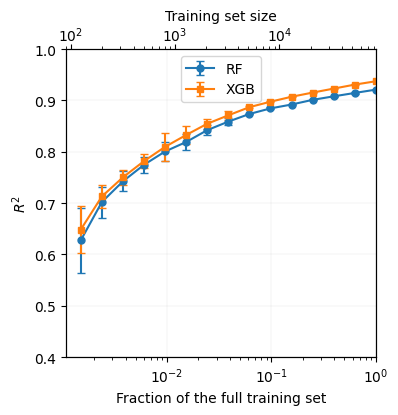

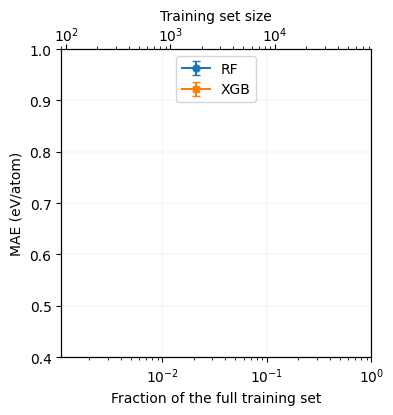

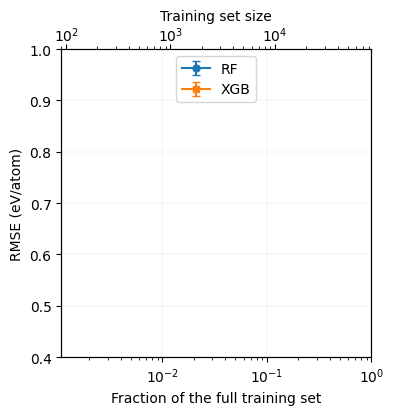

In [ ]:
for metric in ['r2','mae', 'rmse']:
    plot_metrics_vs_size(metrics_interpolation, metric, id_train=id_all)

(<Figure size 400x400 with 2 Axes>,
 <Axes: xlabel='Fraction of the full training set', ylabel='MAE/MAD (eV/atom)'>)

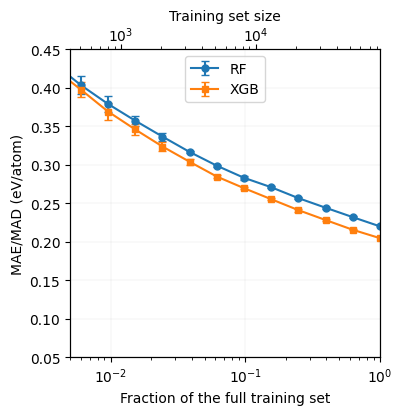

In [ ]:
plot_metrics_vs_size(metrics_interpolation, "mae/mad", id_train=id_all, ylims=[0.05,0.45], xlims=[5e-3,1])

(<Figure size 400x400 with 2 Axes>,
 <Axes: xlabel='Fraction of the full training set', ylabel='RMSE (eV/atom)'>)

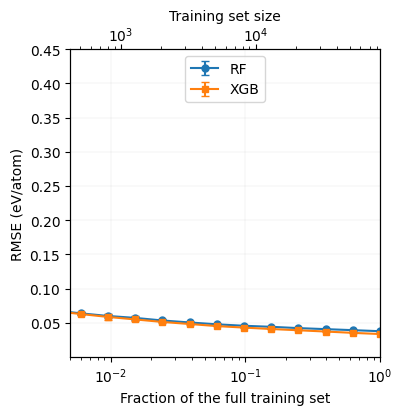

In [ ]:
plot_metrics_vs_size(metrics_interpolation, "rmse", id_train=id_all, ylims=[0.0000005,0.45], xlims=[5e-3,1])

(<Figure size 400x400 with 2 Axes>,
 <Axes: xlabel='Fraction of the full training set', ylabel='MAE (eV/atom)'>)

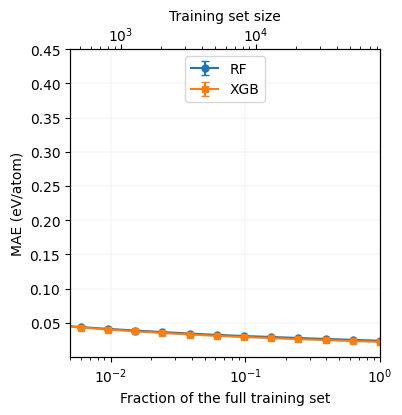

In [ ]:
plot_metrics_vs_size(metrics_interpolation, "mae", id_train=id_all, ylims=[0.0000005,0.45], xlims=[5e-3,1])

In [ ]:
type(metrics_interpolation)

In [ ]:
id_small = df[df['NIONS'] <= 8].index.tolist()
id_large = df[df['NIONS'] > 8].index.tolist()
metrics_extrapolation = train_extrapolation(X_all, y_all, id_small, id_large, 'small2large', 'csv/structure_ini')

# Generate Pickle file

In [ ]:
id_small = df[df['NIONS'] <= 8].index.tolist()
id_large = df[df['NIONS'] > 8].index.tolist()
X_train, y_train = X_all.loc[id_small], y_all.loc[id_small]
X_test, y_test = X_all.loc[id_large], y_all.loc[id_large]

In [ ]:
random_state = 1
# X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=0.6,random_state=random_state)
            # train and predict
X_train.drop(columns=['formula'], inplace=True)
y_train.drop(columns=['formula'], inplace=True)
X_test.drop(columns=['formula'], inplace=True)
y_test.drop(columns=['formula'], inplace=True)

model = xgb.XGBRegressor(
                    n_estimators=500,
                    learning_rate=0.4,
                    reg_lambda=0.01,reg_alpha=0.1,
                    colsample_bytree=0.5,colsample_bylevel=0.7,
                    num_parallel_tree=6,
                    tree_method='gpu_hist', gpu_id=0)
model, _, _ = train_predict(model, X_train, y_train, X_test, y_test)

In [ ]:


model = RandomForestRegressor(
            n_estimators=100,
            bootstrap=False,
            max_features=1/3,
            n_jobs=-1,
            random_state=random_state)
model, _, _ = train_predict(model, X_train, y_train, X_test, y_test)

In [ ]:
y_pred = (model.predict(X_test.iloc[[0]]))
y_true = y_test.iloc[[0]]

In [ ]:
X_test.iloc[[0]]

In [ ]:
y_pred, y_true

In [ ]:
import pickle
# save the model to disk
pickle.dump(model,open("/content/rf-extrapolate.pkl", 'wb'))

#Load the model
# model = pickle.load(open(model_file_path, 'rb'))

#Saving a Keras model
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
# model.save("my_model")